In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


In [ ]:
df=pd.read_csv(r"E:\2022-2023 hk1\PTTK\CK\code\1-12-2017 1-12-2022\MSN Historical Data.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/1/2017,68500.0,67000.0,69400.0,66500.0,725370.0,0.02
1,12/4/2017,69000.0,70000.0,70000.0,68800.0,1190000.0,0.01
2,12/5/2017,68900.0,69000.0,70100.0,68600.0,777070.0,0.00
3,12/6/2017,67700.0,68900.0,69000.0,66000.0,1080000.0,-0.02
4,12/7/2017,69000.0,68600.0,69800.0,67300.0,1560000.0,0.02
...,...,...,...,...,...,...,...
1244,11/25/2022,94000.0,90000.0,94500.0,90000.0,923100.0,0.06
1245,11/28/2022,97200.0,94000.0,97200.0,93500.0,2130000.0,0.03
1246,11/29/2022,99000.0,97200.0,99000.0,95500.0,2170000.0,0.02
1247,11/30/2022,102000.0,99500.0,102000.0,92900.0,1500000.0,0.03


In [ ]:
df['Date']=pd.to_datetime(df.Date,format='%m/%d/%Y')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))

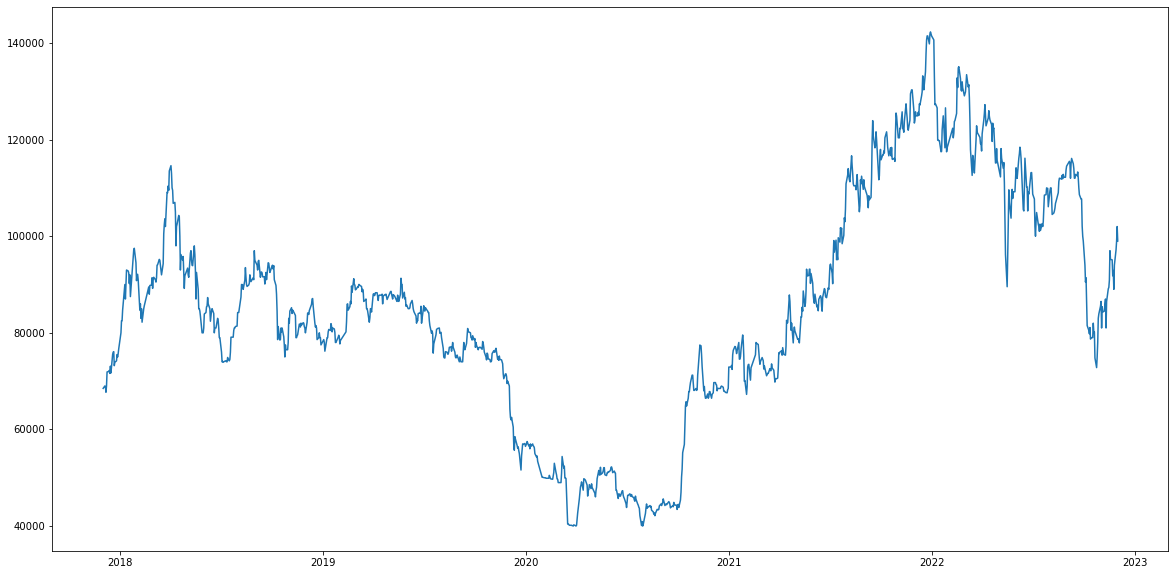

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df['Price'])
plt.show()

In [ ]:
df.index = df.Date
df = pd.DataFrame(df, columns=['Price'])



In [ ]:
import math
data = df.values
t = math.ceil(len(df)* 0.9)
train_data = data[:t]
test_data = data[t:]

In [ ]:
sc = MinMaxScaler(feature_range=(0, 1))
sc_train = sc.fit_transform(data)
sc_train

array([[0.27865166],
       [0.28353977],
       [0.28256215],
       ...,
       [0.57682644],
       [0.60615511],
       [0.57682644]])

In [ ]:
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
    x_train.append(sc_train[i-60:i, 0])
    y_train.append(sc_train[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

print('x_train shape == {}.'.format(x_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

x_train shape == (1065, 60, 1).
y_train shape == (1065, 1).


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

model = Sequential()
model.add(LSTM(64, input_shape =(x_train.shape[1],1), activation="relu", return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True, activation="relu"))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='mean_squared_error')
predictmodel = model.fit(x_train, y_train ,batch_size=32, epochs=100)

Epoch 1/100
34/34 [==============================] - 5s 46ms/step - loss: 0.2238
Epoch 2/100
34/34 [==============================] - 2s 48ms/step - loss: 0.1622
Epoch 3/100
34/34 [==============================] - 2s 47ms/step - loss: 0.0378
Epoch 4/100
34/34 [==============================] - 2s 47ms/step - loss: 0.0145
Epoch 5/100
34/34 [==============================] - 2s 47ms/step - loss: 0.0119
Epoch 6/100
34/34 [==============================] - 2s 47ms/step - loss: 0.0112
Epoch 7/100
34/34 [==============================] - 2s 47ms/step - loss: 0.0102
Epoch 8/100
34/34 [==============================] - 2s 57ms/step - loss: 0.0093
Epoch 9/100
34/34 [==============================] - 2s 48ms/step - loss: 0.0089
Epoch 10/100
34/34 [==============================] - 2s 47ms/step - loss: 0.0081
Epoch 11/100
34/34 [==============================] - 2s 48ms/step - loss: 0.0086
Epoch 12/100
34/34 [==============================] - 2s 47ms/step - loss: 0.0082
Epoch 13/100
34/34 [=====

In [ ]:
y_train = sc.inverse_transform(y_train)

y_train_predict = model.predict(x_train)

y_train_predict = sc.inverse_transform(y_train_predict)

34/34 [==============================] - 3s 31ms/step


In [ ]:
test = df[len(train_data)-60:].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

x_test = []
for i in range(60, test.shape[0]):
    x_test.append(sc_test[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

y_test = data[t:]

print('x_test shape == {}.'.format(x_test.shape))
print('y_test shape == {}.'.format(y_test.shape))

x_test shape == (124, 60, 1).
y_test shape == (124, 1).


In [ ]:
y_test_predict = model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)

4/4 [==============================] - 0s 29ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
mae = mean_absolute_error(y_test, y_test_predict)
mape = mean_absolute_percentage_error(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_predict)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 4910.98
MAPE: 5.17%
MSE: 43254489.18
RMSE: 6576.81
R2: 0.71


C:\Users\PC\AppData\Local\Temp\ipykernel_7596\4170711069.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['pred'] = y_test_predict


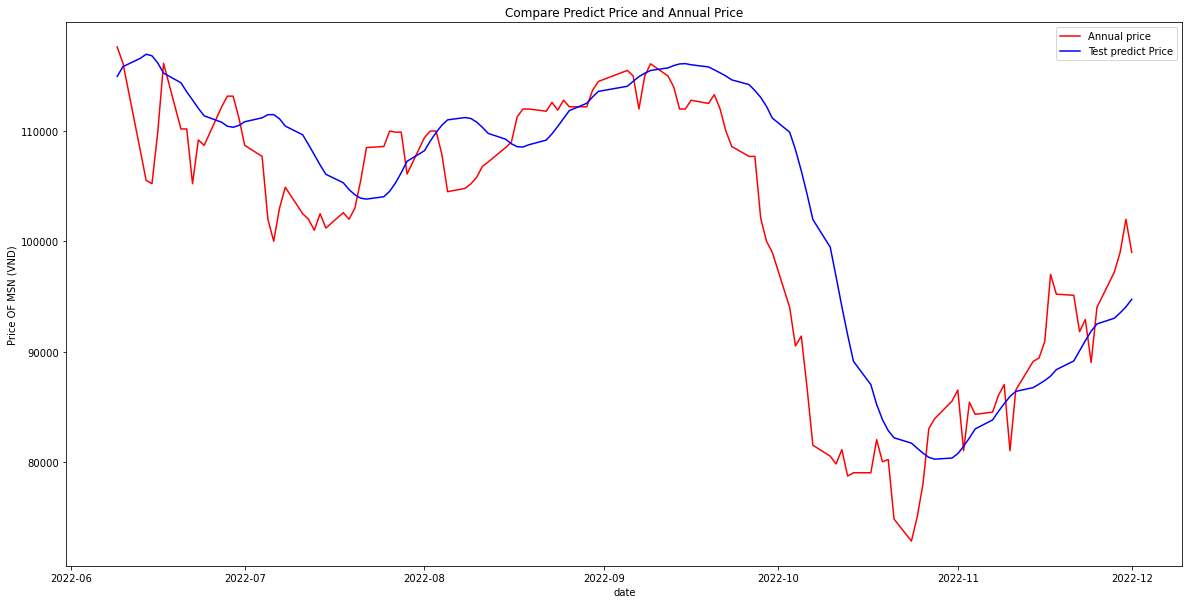

In [ ]:
test_data1 = df[t:]

plt.figure(figsize=(20,10))
plt.plot(df[t:], label='Annual price', color='r')
test_data1['pred'] = y_test_predict
plt.plot(test_data1['pred'], label='Test predict Price', color='b')
plt.title('Compare Predict Price and Annual Price')
plt.xlabel('date')
plt.ylabel('Price OF MSN (VND)')
plt.legend()
plt.show()

In [ ]:
predictions_future = model.predict(x_test[-30:])

1/1 [==============================] - 0s 87ms/step


In [ ]:
predictions_future

array([[0.4123205 ],
       [0.40756494],
       [0.4030394 ],
       [0.39864296],
       [0.39499474],
       [0.39336497],
       [0.39434505],
       [0.39821637],
       [0.4047557 ],
       [0.4121228 ],
       [0.42015874],
       [0.42816657],
       [0.43564922],
       [0.44256115],
       [0.44896817],
       [0.4534769 ],
       [0.45681423],
       [0.45987546],
       [0.4631042 ],
       [0.46696895],
       [0.47278512],
       [0.480426  ],
       [0.48944396],
       [0.4984625 ],
       [0.5068721 ],
       [0.5132869 ],
       [0.5183616 ],
       [0.52312136],
       [0.5284129 ],
       [0.53515303]], dtype=float32)

In [ ]:
predict = sc.inverse_transform(predictions_future)
predict

array([[82172.85 ],
       [81686.414],
       [81223.5  ],
       [80773.79 ],
       [80400.62 ],
       [80233.914],
       [80334.164],
       [80730.16 ],
       [81399.06 ],
       [82152.63 ],
       [82974.62 ],
       [83793.734],
       [84559.125],
       [85266.14 ],
       [85921.51 ],
       [86382.7  ],
       [86724.07 ],
       [87037.2  ],
       [87367.47 ],
       [87762.79 ],
       [88357.72 ],
       [89139.3  ],
       [90061.734],
       [90984.234],
       [91844.445],
       [92500.6  ],
       [93019.695],
       [93506.56 ],
       [94047.83 ],
       [94737.27 ]], dtype=float32)

In [ ]:
predict.shape

(30, 1)

In [ ]:
datelist_future = pd.date_range(start="12/2/2022",end="12/31/2022")

In [ ]:
new_date=df.index.append(datelist_future)
new_date

DatetimeIndex(['2017-12-01', '2017-12-04', '2017-12-05', '2017-12-06',
               '2017-12-07', '2017-12-08', '2017-12-11', '2017-12-12',
               '2017-12-13', '2017-12-14',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=1279, freq=None)

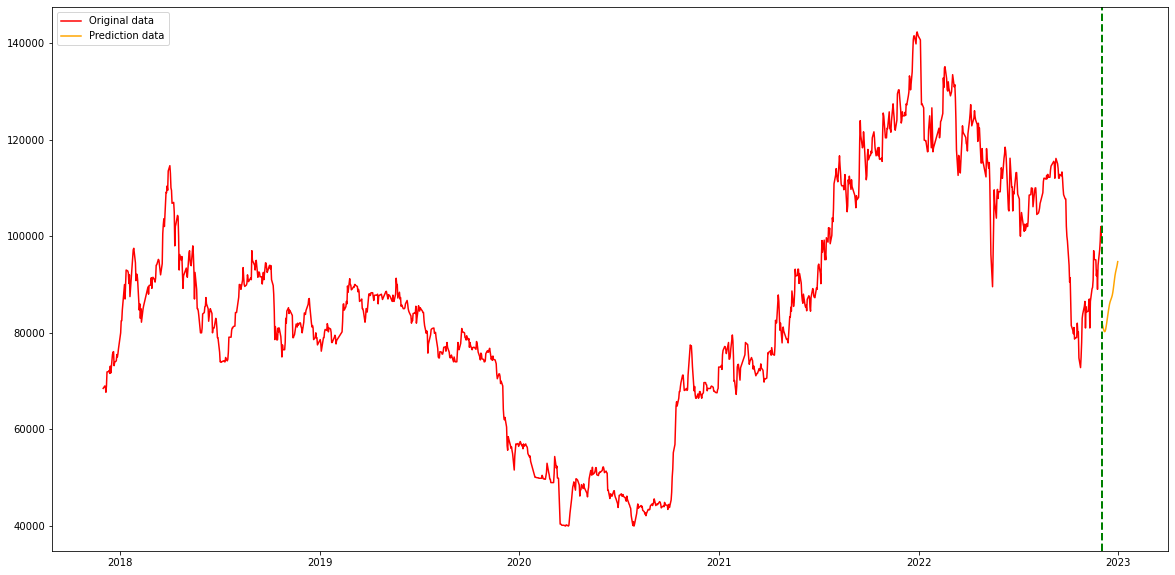

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(df.index, df['Price'], 'red', label="Original data")
plt.plot(datelist_future, predict, 'orange', label="Prediction data")
plt.axvline(x = min(datelist_future), color='green', linewidth=2, linestyle='--')
plt.legend(loc='upper left')
plt.show()